In [1]:
#참고: https://yamalab.tistory.com/118

from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=30).fit(x_train)
reduced_X = pca.transform(x_train)

from sklearn.cluster import KMeans

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(reduced_X)

y_pred = model.labels_

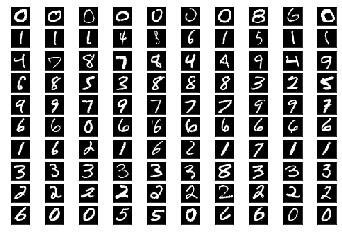

In [3]:
import matplotlib.pyplot as plt

def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(x_train[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()
    
viz_img(y_pred)